# **DL Lab 4**
## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**


In [2]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import keras_tuner as kt
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

### **Question 1**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 135s 1us/step


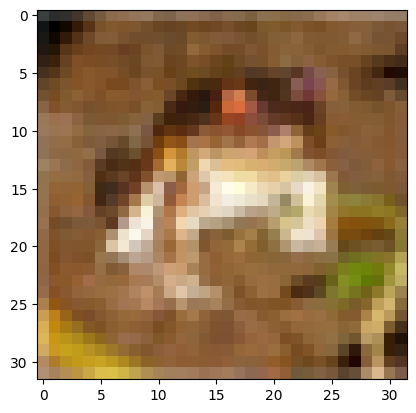

In [3]:
batch_size = 128
num_classes = 10
epochs = 10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
plt.imshow(X_train[0])
plt.show()

### **Reshaping**

In [4]:
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
print(f'{X_train.shape}----{X_test.shape} ||| {y_train_cat.shape}----{y_test_cat.shape}')

(50000, 3072)----(10000, 3072) ||| (50000, 10)----(10000, 10)


In [6]:
estop = EarlyStopping(monitor = 'val_loss', min_delta = 1e-5, mode= 'min', patience=4, verbose = 1, restore_best_weights=True)

In [7]:
model = Sequential()
model.add(Dense(3072, activation='relu', input_shape=(3072,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()


e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3072)           │     9,440,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,179,146 (42.65 MB)

 Trainable params: 11,179,146 (42.65 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='CategoricalCrossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])
hist = model.fit(X_train, y_train_cat, verbose=1, batch_size=128, epochs=10, validation_data=(X_test, y_test_cat), callbacks=[estop])


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.1322 - loss: 2.3046 - val_accuracy: 0.2432 - val_loss: 2.1496
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2019 - loss: 2.1739 - val_accuracy: 0.2777 - val_loss: 2.0653
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2334 - loss: 2.1037 - val_accuracy: 0.2980 - val_loss: 2.0034
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2549 - loss: 2.0520 - val_accuracy: 0.3191 - val_loss: 1.9556
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2702 - loss: 2.0097 - val_accuracy: 0.3288 - val_loss: 1.9200
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2839 - loss: 1.9751 - val_accuracy: 0.3388 - val_loss: 1.8892
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2993 - loss: 1.9430 - val_accuracy: 0.3473 - val_loss: 1.8640
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3108 - loss: 1.9163 - 

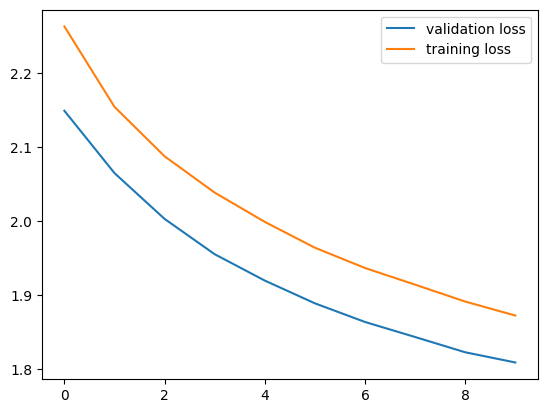

In [9]:
plt.plot(hist.history['val_loss'], label=('validation loss'))
plt.plot(hist.history['loss'], label=('training loss'))
plt.legend()
plt.show()

### **Question 2**

In [10]:
from keras.regularizers import l2

In [11]:
model2 = Sequential()
model2.add(Dense(3072, activation='relu', input_shape=(3072,)))
model2.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(10, activation='softmax'))
model2.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3072)           │     9,440,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,179,146 (42.65 MB)

 Trainable params: 11,179,146 (42.65 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model2.compile(loss='CategoricalCrossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist2 = model2.fit(X_train, y_train_cat, verbose=1, batch_size=256, epochs=10, validation_data=(X_test, y_test_cat))


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.1920 - loss: 3.3278 - val_accuracy: 0.3565 - val_loss: 2.1265
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.3604 - loss: 2.0887 - val_accuracy: 0.3989 - val_loss: 1.9434
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.4014 - loss: 1.9177 - val_accuracy: 0.4117 - val_loss: 1.8324
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.4287 - loss: 1.8074 - val_accuracy: 0.4242 - val_loss: 1.7725
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.4456 - loss: 1.7267 - val_accuracy: 0.4483 - val_loss: 1.7157
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.4627 - loss: 1.6471 - val_accuracy: 0.4642 - val_loss: 1.6231
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.4733 - loss: 1.6040 - val_accuracy: 0.4625 - val_loss: 1.6058
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.4792 - loss: 1.5657 - 

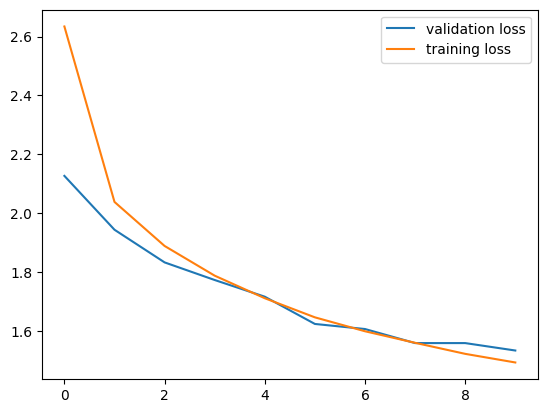

In [13]:
plt.plot(hist2.history['val_loss'], label=('validation loss'))
plt.plot(hist2.history['loss'], label=('training loss'))
plt.legend()
plt.show()


### **Question 3**

In [94]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# X_train = X_train.reshape(-1, 28*28).astype('float32') / 255
# X_test = X_test.reshape(-1, 28*28).astype('float32') / 255


In [95]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [99]:
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28*28, )))
    units = hp.Int('units', min_value=64, max_value=512, step=64)
    model.add(Dense(units, activation='relu', input_shape=(28*28,)))
    
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=SGD(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [100]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='mnist_tuning',
    project_name="dense_dropout_tune"
)

tuner.search(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

Reloading Tuner from mnist_tuning\dense_dropout_tune\tuner0.json


In [101]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

ValueError: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(784, 192), Received: value.shape=(784, 10). Target variable: <Variable path=sequential/dense/kernel, shape=(784, 192), dtype=float32, value=[[ 0.01180863 -0.04422443  0.06759758 ...  0.04044311  0.05660379
  -0.03270214]
 [-0.06932176 -0.05802763 -0.00268577 ...  0.0309189  -0.04795397
   0.04151507]
 [-0.00342433 -0.04254506  0.0426529  ...  0.07262127 -0.00892197
   0.07492775]
 ...
 [-0.04394289 -0.06941704 -0.02698757 ...  0.0157226  -0.01299956
  -0.06867132]
 [ 0.02050404 -0.06748557  0.01989777 ...  0.0142956  -0.061411
  -0.00957689]
 [ 0.07599893  0.00742379  0.01193719 ...  0.05697888  0.01786501
  -0.01343394]]>

List of objects that could not be loaded:
[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>]

In [ ]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.8820 - loss: 0.4512
Test accuracy: 0.8971999883651733


In [ ]:
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Best units: {best_hps.get('units')}")
# print(f"Best Dropout: {best_hps.get('dropout|')}")

Best units: 192
